Lagrange Polynomial
========

# Theory

## Definition

## Examples


# Implementation
Our representation of the set of collocation points will be through the use of `numpy` vector that holds in each row a `x` and `y` values "aka the input values and its evaluation by the unknown function"

$$
\begin{bmatrix}
    x_1     &  y_1      \\
                        \\
    \vdots  &  \vdots   \\
                        \\
    x_N     &  y_N      \\      
\end{bmatrix}
$$

$
\text{where} \\
\begin{array}{l l}
    \qquad x, \; y &: \text{Input value and its evaluation by the unknown function, respectively}\\
    \qquad N &: \text{Number of collocation points}
\end{array}
$

Moreover the points will be sampled from an analytical function that we define. We do this so we can better compare the lagrange polynomial approximation with the original function.

## Imports

In [86]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [87]:
N = 4                      # number of collocation points
a, b = [-5,5]              # interpolation interval
f = lambda x : np.sin(x)   # function to sample points from

## Algorithm


In [88]:
def LP(points: list[float, float]) -> tuple[Callable, list[Callable]]:
    '''
    Construct the lagrange polynomial approximation through given set of collocation points

    Args:
        points: Collocation points

    Returns:
        The lagrange polynomial approximation and its bases
    '''

    bases = []
    func = 0
    for x_i, y_i in points:
        l_i = 1
        for x_j, _ in points:
            if x_i == x_j:
                continue
            
            l_i *= ((x - x_j)/(x_i - x_j))

        bases.append(sp.lambdify(x, l_i))
        func += y_i*l_i
    
    return sp.lambdify(x, func), bases

In [89]:
# sample the collocation points
xx = np.linspace(a, b, num=N)
points = np.stack((xx, f(xx)), axis=-1)

# get 
g, bases = LP(points)

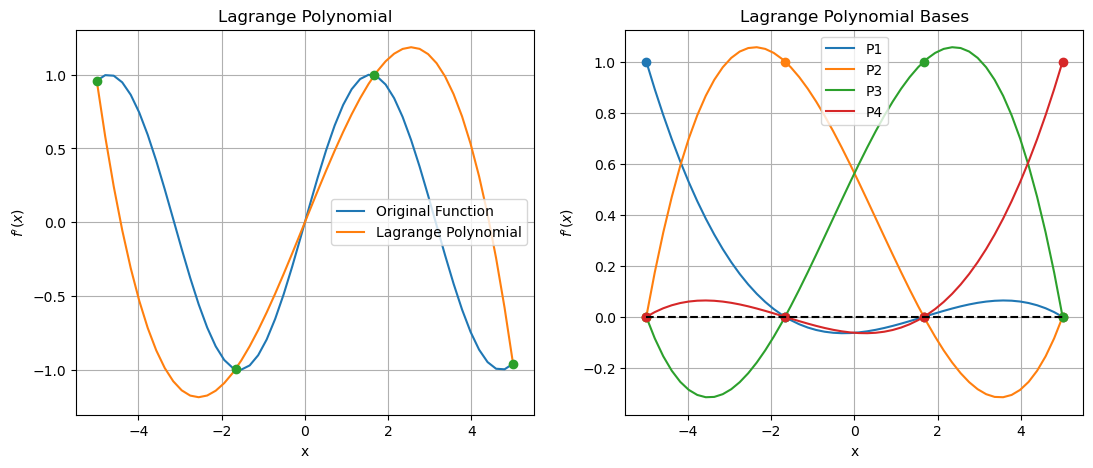

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))

# fine domain and collocation points
domain = np.linspace(a, b) 
x_values, y_values = points[:,0], points[:,1]

# func plot
ax[0].plot(domain, f(domain), label="Original Function")

# lagrange polynomial plot
ax[0].plot(domain, g(domain), label="Lagrange Polynomial")
ax[0].plot(x_values, y_values, "o")
ax[0].set(xlabel="x", ylabel=r"$f'(x)$", title="Lagrange Polynomial")
ax[0].legend()
ax[0].grid(True)

# bases functions plot
for i, basis in enumerate(bases):
    color = next(ax[1]._get_lines.prop_cycler)['color']
    ax[1].plot(domain, basis(domain), color=color, label=f"P{i+1}")
    ax[1].plot(x_values, basis(x_values), "o", color=color)
ax[1].plot(domain, np.zeros_like(domain), "k--")
ax[1].set(xlabel="x", ylabel=r"$f'(x)$", title="Lagrange Polynomial Bases")
ax[1].legend()
ax[1].grid(True)
